In [1]:
import kaggle
import zipfile
import numpy as np
import pandas as pd
import os
import cv2
import random
import unittest
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    MaxPooling2D,
    Conv2D,
    Flatten,
    BatchNormalization,
)
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

### Load data

In [2]:
!kaggle competitions download -c digit-recognizer

digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
DIR = r"C:\Users\Desktop\Desktop\JuPyter Notebooks\digit-recognizer"

In [4]:
def data_loader(DIR):
    train_data = pd.read_csv(os.path.join(DIR, "train.csv"))
    test_data = pd.read_csv(os.path.join(DIR, "test.csv"))
    return train_data, test_data

In [5]:
train_data, test_data = data_loader(DIR)

### Visualize data

In [6]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train, y_train = np.array(train_data.loc[:, "pixel0":]), np.array(train_data.label)

In [8]:
x_train_shuffled, y_train_shuffled = shuffle(x_train, y_train, random_state=0)

In [9]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Shape data for training

In [10]:
x_test = np.array(test_data.loc[:, "pixel0":])

In [11]:
x_train_shuffled = x_train.reshape(42000, 28, 28)
x_test = x_test.reshape(28000, 28, 28)

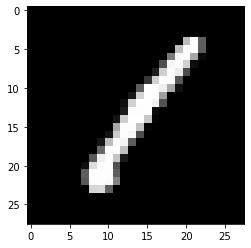

In [12]:
plt.imshow(x_train_shuffled[0], cmap="gray")

In [13]:
x_train_shuffled_gray = x_train.reshape(42000, 28, 28, 1)
x_test_gray = x_test.reshape(28000, 28, 28, 1)
x_train_shuffled_gray = x_train_shuffled_gray / 255.0
x_test_gray = x_test_gray / 255.0
# random.shuffle(x_train_gray)

In [14]:
y_train_shuffled = tf.keras.utils.to_categorical(y_train, num_classes=10)

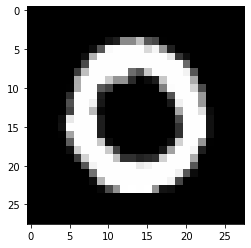

In [15]:
plt.imshow(x_train_shuffled[1], cmap="gray")

In [16]:
y_train_shuffled[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Check shapes

In [17]:
class TestShapes(unittest.TestCase):
    def test_shapes(self):
        expect_train_data_shape = (42000, 785)
        expect_test_data_shape = (28000, 784)
        expect_x_train_shuffled_shape = (42000, 28, 28)
        expect_y_train_shuffled_shape = (42000,)
        expect_x_train_shuffled_gray_shape = (42000, 28, 28, 1)
        expect_x_test_gray_shape = (28000, 28, 28, 1)
        expect_y_train_shuffled_shape = (
            42000,
            10,
        )  # each label is a size 10 vector one hot encoding

        self.assertEqual(expect_train_data_shape, train_data.shape)
        self.assertEqual(expect_test_data_shape, test_data.shape)
        self.assertEqual(expect_x_train_shuffled_shape, x_train_shuffled.shape)
        self.assertEqual(expect_y_train_shuffled_shape, y_train_shuffled.shape)
        self.assertEqual(
            expect_x_train_shuffled_gray_shape, x_train_shuffled_gray.shape
        )
        self.assertEqual(expect_x_test_gray_shape, x_test_gray.shape)
        self.assertEqual(expect_y_train_shuffled_shape, y_train_shuffled.shape)


if __name__ == "__main__":
    unittest.main(argv=["first-arg-is-ignored"], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


### Create model

In [18]:
model_1 = Sequential(
    [
        Conv2D(64, (3, 3), padding="same", input_shape=(28, 28, 1), activation="relu"),
        MaxPooling2D(2, 2),
        Conv2D(32, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(2, 2),
        Conv2D(16, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.2),
        Dense(10, activation="softmax"),
    ]
)

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0

In [20]:
model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

### Train model

In [21]:
history = model_1.fit(
    x_train_shuffled_gray,
    y_train_shuffled,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
)

Epoch 1/20
1050/1050 [==============================] - 6s 4ms/step - loss: 0.2758 - accuracy: 0.9124 - val_loss: 0.0975 - val_accuracy: 0.9692
Epoch 2/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0836 - accuracy: 0.9739 - val_loss: 0.0530 - val_accuracy: 0.9840
Epoch 3/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0585 - accuracy: 0.9813 - val_loss: 0.0499 - val_accuracy: 0.9849
Epoch 4/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0483 - val_accuracy: 0.9860
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0410 - accuracy: 0.9865 - val_loss: 0.0379 - val_accuracy: 0.9876
Epoch 6/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0311 - accuracy: 0.9896 - val_loss: 0.0518 - val_accuracy: 0.9863
Epoch 7/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0291 - accuracy: 0.9902 - val_loss: 0.0487 - val_accuracy:

### Plot loss

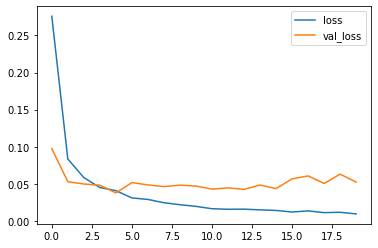

In [22]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss", "val_loss"])

### Generate Predictions

In [23]:
results = model_1.predict(x_test_gray, verbose=1)
results = results.argmax(axis=1)

875/875 [==============================] - 1s 857us/step


### Submit output

In [24]:
submission = pd.read_csv(os.path.join(DIR, "sample_submission.csv"))
submission["Label"] = results
submission.to_csv("predictions.csv", index=False)